# Mask Detector

## 1) Extraction of data from XML files:

In [12]:
import os
from xml.dom import minidom
import tensorflow as tf
import datetime
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import shutil

path = "/home/idriss/Downloads/mask dataset/"
files = os.listdir(path+'annotations')

In [64]:
output = dict()

for file in files:
    mydoc = minidom.parse(path+'annotations/'+file)
    objects = mydoc.getElementsByTagName('object')
    for i in objects:
        name = mydoc.getElementsByTagName('name')
        xmin = mydoc.getElementsByTagName('xmin')
        ymin = mydoc.getElementsByTagName('ymin')
        xmax = mydoc.getElementsByTagName('xmax')
        ymax = mydoc.getElementsByTagName('ymax')
        output[file.split('.')[0]]={"name":[i.firstChild.data for i in name],"xmin":[int(i.firstChild.data) for i in xmin],"ymin":[int(i.firstChild.data) for i in ymin],"xmax":[int(i.firstChild.data) for i in xmax],"ymax":[int(i.firstChild.data) for i in ymax]}

In [65]:
output

{'maksssksksss785': {'name': ['without_mask'],
  'xmin': [159],
  'ymin': [90],
  'xmax': [217],
  'ymax': [164]},
 'maksssksksss264': {'name': ['with_mask',
   'with_mask',
   'with_mask',
   'with_mask',
   'with_mask',
   'with_mask',
   'with_mask'],
  'xmin': [21, 165, 145, 110, 275, 244, 338],
  'ymin': [54, 18, 89, 218, 88, 18, 12],
  'xmax': [90, 194, 195, 233, 320, 274, 374],
  'ymax': [119, 47, 139, 267, 136, 48, 48]},
 'maksssksksss766': {'name': ['with_mask'],
  'xmin': [86],
  'ymin': [177],
  'xmax': [188],
  'ymax': [305]},
 'maksssksksss195': {'name': ['with_mask'],
  'xmin': [121],
  'ymin': [145],
  'xmax': [305],
  'ymax': [356]},
 'maksssksksss794': {'name': ['with_mask', 'with_mask'],
  'xmin': [65, 254],
  'ymin': [179, 189],
  'xmax': [137, 332],
  'ymax': [263, 276]},
 'maksssksksss122': {'name': ['with_mask'],
  'xmin': [201],
  'ymin': [38],
  'xmax': [345],
  'ymax': [213]},
 'maksssksksss719': {'name': ['with_mask',
   'with_mask',
   'with_mask',
   'withou

## 2) Data Preparation:

In [135]:
if not os.path.exists(path+'faces/with_mask'):
    os.makedirs(path+'faces/with_mask')
if not os.path.exists(path+'faces/without_mask'):
    os.makedirs(path+'faces/without_mask')
if not os.path.exists(path+'faces/mask_weared_incorrect'):
    os.makedirs(path+'faces/mask_weared_incorrect')

In [123]:
for s in ['train','test']:
    if not os.path.exists(path+'faces/'+s+'/with_mask'):
        os.makedirs(path+'faces/'+s+'/with_mask')
    if not os.path.exists(path+'faces/'+s+'/without_mask'):
        os.makedirs(path+'faces/'+s+'/without_mask')
    if not os.path.exists(path+'faces/'+s+'/mask_weared_incorrect'):
        os.makedirs(path+'faces/'+s+'/mask_weared_incorrect')

In [47]:
images = [f for f in os.listdir(path+'images')]

In [56]:
c = 0
for i in images:
    img = load_img(path+'images/'+i)
    x = img_to_array(img)
    a = output[i.split('.')[0]]
    for j,k in enumerate(a['name']):
        z= x [a['ymin'][j]:a['ymax'][j],a['xmin'][j]:a['xmax'][j]]
        z = array_to_img(z).resize((150,150))
        save_img(path+'faces/'+k+'/'+str(c)+'.png',z)
        c += 1

In [131]:
for i in ['with_mask','without_mask','mask_weared_incorrect']:
    imgs = os.listdir(path+'faces/'+i)
    random.shuffle(imgs)
    for j,k in enumerate(imgs):
        if j >= 0.3*len(imgs):
            l = 'train'
        else: l = 'test'
        shutil.move(path+'/faces/'+i+'/'+k, path+'faces/'+l+'/'+i)

In [136]:
for i in ['with_mask','without_mask','mask_weared_incorrect']:
    os.rmdir(path+'/faces/'+i)

## 3) Data Visualisation:

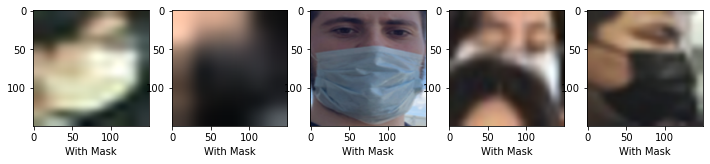

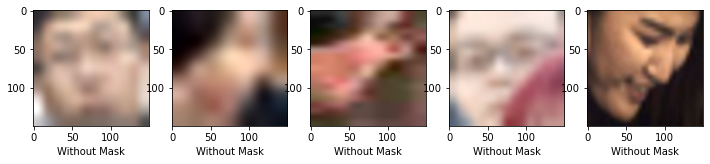

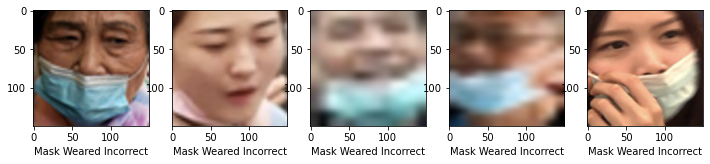

In [2]:
#with Mask
plt.figure(figsize=(12,7))
for i in range(5):
    sample = random.choice(os.listdir(path+"faces/train/with_mask/"))
    plt.subplot(1,5,i+1)
    img = load_img(path+"faces/train/with_mask/"+sample)
    plt.subplots_adjust(hspace=0.001)
    plt.xlabel("With Mask")
    plt.imshow(img)
plt.show()

#without Mask
plt.figure(figsize=(12,7))
for i in range(5):
    sample = random.choice(os.listdir(path+"faces/train/without_mask/"))
    plt.subplot(1,5,i+1)
    img = load_img(path+"faces/train/without_mask/"+sample)
    plt.subplots_adjust(hspace=0.001)
    plt.xlabel("Without Mask")
    plt.imshow(img)
plt.show()

#Mask Weared Incorrect
plt.figure(figsize=(12,7))
for i in range(5):
    sample = random.choice(os.listdir(path+"faces/train/mask_weared_incorrect/"))
    plt.subplot(1,5,i+1)
    img = load_img(path+"faces/train/mask_weared_incorrect/"+sample)
    plt.subplots_adjust(hspace=0.001)
    plt.xlabel("Mask Weared Incorrect")
    plt.imshow(img)
plt.show()

## 4) Data Augmentation:

In [3]:
height = 150
width=150
train_dir = path + 'faces/train'
test_dir = path + 'faces/test'
train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.2,shear_range = 0.2,zoom_range=0.2,horizontal_flip=True)
train = train_datagen.flow_from_directory(directory=train_dir,target_size=(height,width),
                                          class_mode="categorical",batch_size=8,subset = "training")

valid_datagen = ImageDataGenerator(rescale=1.0/255)

valid = train_datagen.flow_from_directory(directory=test_dir,target_size=(height,width),
                                          class_mode="categorical",batch_size=8,subset="validation")

Found 2280 images belonging to 3 classes.
Found 244 images belonging to 3 classes.


## 5) Model Building:

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(150,150,3))

In [30]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [29]:
for layer in mobilenet.layers[:-4]:
    layer.trainable = False

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(3,activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 96003     
Total params: 2,353,987
Trainable params: 508,803
Non-trainable params: 1,845,184
_________________________________________________________________


In [33]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("moblenet_facemask.h5",monitor="val_accuracy",save_best_only=True,verbose=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [16]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [23]:
#%tensorboard --logdir logs/fit

In [36]:
history = model.fit(train,steps_per_epoch=len(train)// 8,validation_data=valid,
                             validation_steps = len(valid)//8,callbacks=[tensorboard_callback],epochs=100)

Epoch 1/100
35/35 [==============================] - 9s 263ms/step - loss: 1.0325 - accuracy: 0.8214 - val_loss: 1.6021 - val_accuracy: 0.6667
Epoch 2/100
35/35 [==============================] - 5s 154ms/step - loss: 0.8427 - accuracy: 0.8036 - val_loss: 0.0378 - val_accuracy: 0.9583
Epoch 3/100
35/35 [==============================] - 4s 125ms/step - loss: 0.7416 - accuracy: 0.7857 - val_loss: 1.7126 - val_accuracy: 0.8333
Epoch 4/100
35/35 [==============================] - 8s 239ms/step - loss: 1.0814 - accuracy: 0.8286 - val_loss: 0.7001 - val_accuracy: 0.9583
Epoch 5/100
35/35 [==============================] - 9s 271ms/step - loss: 1.0489 - accuracy: 0.8357 - val_loss: 1.1572 - val_accuracy: 0.8333
Epoch 6/100
35/35 [==============================] - 9s 246ms/step - loss: 1.6734 - accuracy: 0.8107 - val_loss: 2.1016 - val_accuracy: 0.8750
Epoch 7/100
35/35 [==============================] - 11s 315ms/step - loss: 1.0141 - accuracy: 0.8214 - val_loss: 0.8347 - val_accuracy: 0.958

Epoch 58/100
35/35 [==============================] - 6s 169ms/step - loss: 0.9467 - accuracy: 0.7964 - val_loss: 1.6031 - val_accuracy: 0.7500
Epoch 59/100
35/35 [==============================] - 6s 168ms/step - loss: 0.5040 - accuracy: 0.8607 - val_loss: 1.8197 - val_accuracy: 0.8000
Epoch 60/100
35/35 [==============================] - 5s 140ms/step - loss: 0.7965 - accuracy: 0.8357 - val_loss: 1.5165 - val_accuracy: 0.8333
Epoch 61/100
35/35 [==============================] - 5s 143ms/step - loss: 0.8740 - accuracy: 0.8500 - val_loss: 0.9315 - val_accuracy: 0.7500
Epoch 62/100
35/35 [==============================] - 7s 190ms/step - loss: 0.7184 - accuracy: 0.8036 - val_loss: 0.9893 - val_accuracy: 0.6667
Epoch 63/100
35/35 [==============================] - 6s 172ms/step - loss: 1.0065 - accuracy: 0.8286 - val_loss: 0.2022 - val_accuracy: 0.8750
Epoch 64/100
35/35 [==============================] - 16s 449ms/step - loss: 0.8343 - accuracy: 0.8286 - val_loss: 0.2279 - val_accuracy

InvalidArgumentError: Nan in summary histogram for: block_16_project_BN/gamma_0 [Op:WriteHistogramSummary]

In [ ]:
model.evaluate(valid)

In [154]:
history